In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
# import warnings
# warnings.filterwarnings("ingore")

In [2]:
train =pd.read_csv("Train_SU63ISt.csv")
test=pd.read_csv("Test_0qrQsBZ.csv")

In [3]:
train_Original_data = train.copy()
test_Original_data=test.copy()

In [4]:
print(train.columns)
print(test.columns)

Index(['ID', 'Datetime', 'Count'], dtype='object')
Index(['ID', 'Datetime'], dtype='object')


In [5]:
print(train.dtypes)
print(test.dtypes)


ID           int64
Datetime    object
Count        int64
dtype: object
ID           int64
Datetime    object
dtype: object


In [6]:
print(train.shape)
print(test.shape)

(18288, 3)
(5112, 2)


In [7]:
train["Datetime"]=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test["Datetime"]=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
train_Original_data["Datetime"]=pd.to_datetime(train_Original_data.Datetime,format='%d-%m-%Y %H:%M')
test_Original_data["Datetime"]=pd.to_datetime(test_Original_data.Datetime,format='%d-%m-%Y %H:%M')

In [8]:
for i in (train,test,train_Original_data,test_Original_data):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['hour']=i.Datetime.dt.hour
train.head()

,ID,Datetime,Count,year,month,day,hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [9]:
train["day of a week"]=train["Datetime"].dt.day_of_week
temp = train["Datetime"]

In [10]:
def applyer(row):
    if row.day_of_week==5 or row.day_of_week==6:
        return 1
    else:
        return 0
temp2=train["Datetime"].apply(applyer)
train["weekend"]=temp2

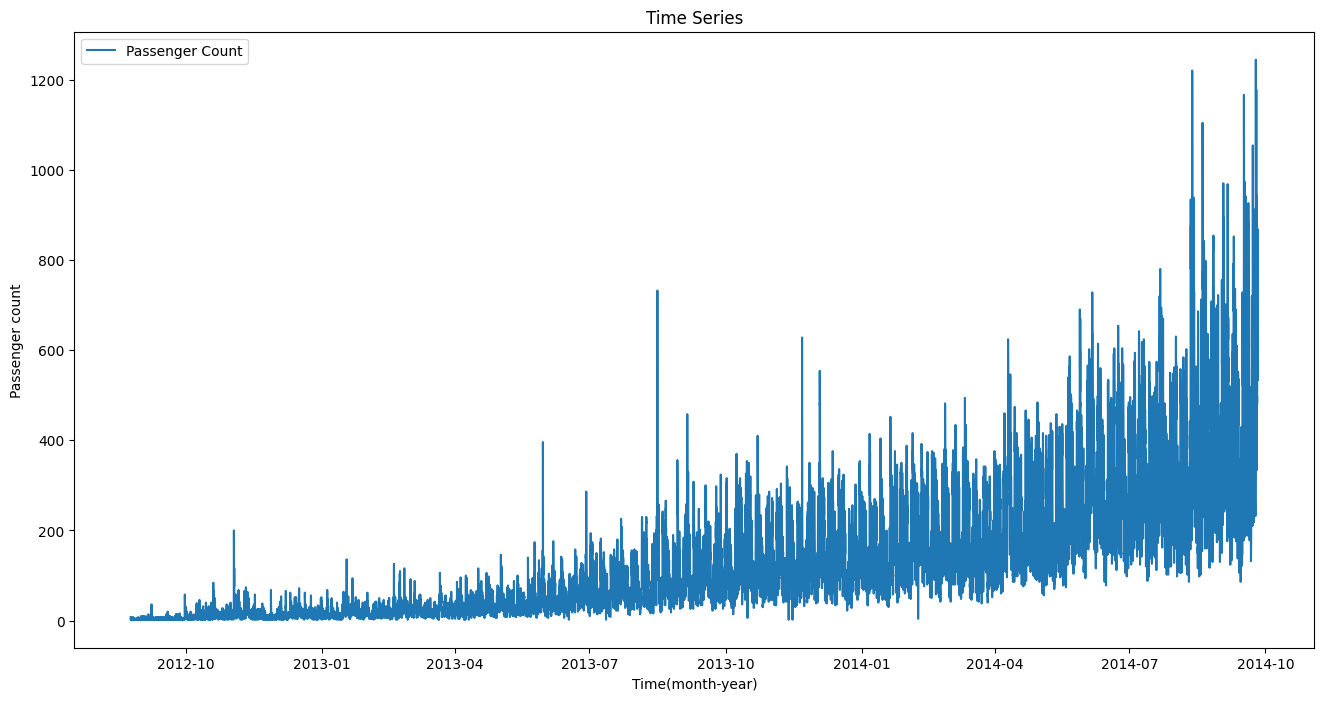

In [11]:
train.index=train["Datetime"]
df=train.drop('ID',axis=1)
ts=train["Count"]
plt.figure(figsize=(16,8))
plt.plot(ts,label="Passenger Count")
plt.title("Time Series")
plt.xlabel("Time(month-year)")
plt.ylabel("Passenger count")
plt.legend(loc="best")


<Axes: xlabel='year'>

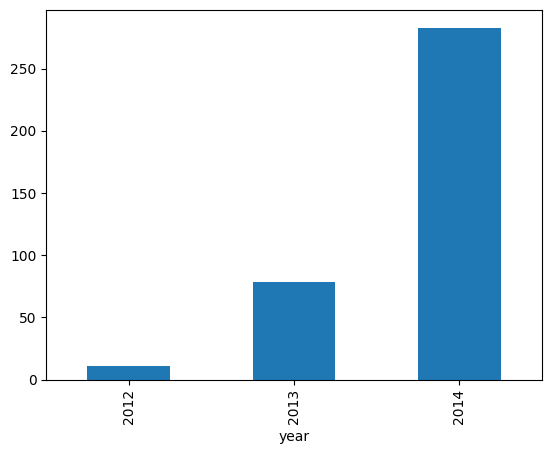

In [12]:
train.groupby("year")["Count"].mean().plot.bar()

<Axes: xlabel='month'>

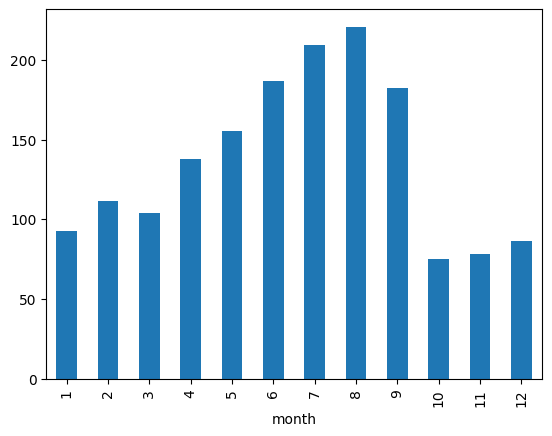

In [13]:
train.groupby("month")["Count"].mean().plot.bar()

<Axes: title={'center': 'Passenger Count(Monthly wise)'}, xlabel='year,month'>

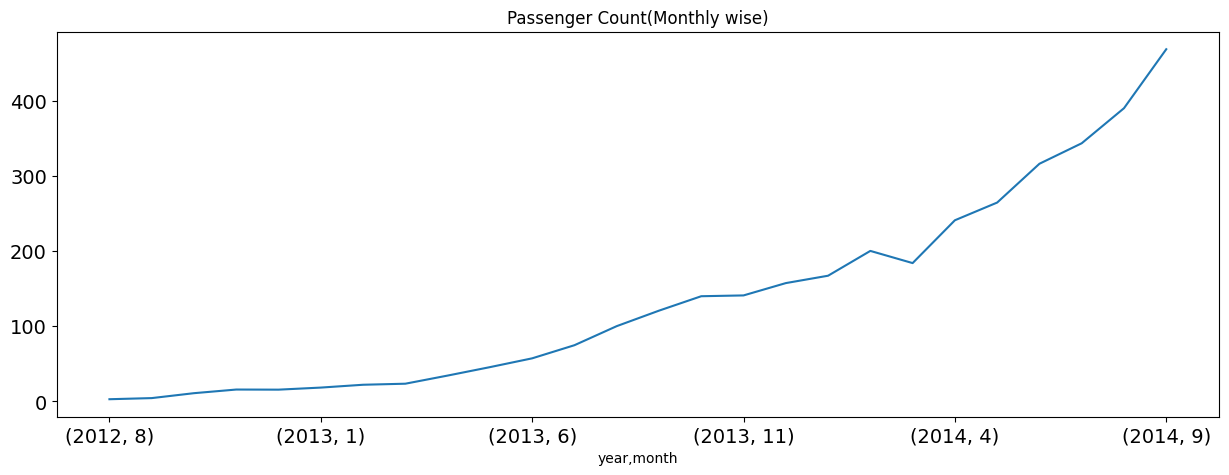

In [14]:
#getting monthly mean of each year
temp = train.groupby(["year","month"])["Count"].mean()
temp.plot(figsize=(15,5), title= "Passenger Count(Monthly wise)",fontsize=14)


<Axes: xlabel='day'>

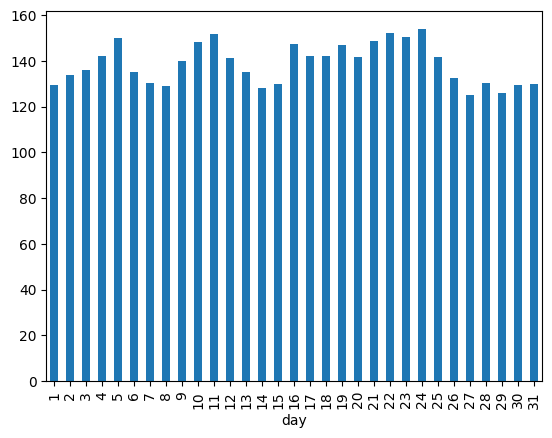

In [15]:
train.groupby("day")["Count"].mean().plot.bar(
    
)

<Axes: xlabel='hour'>

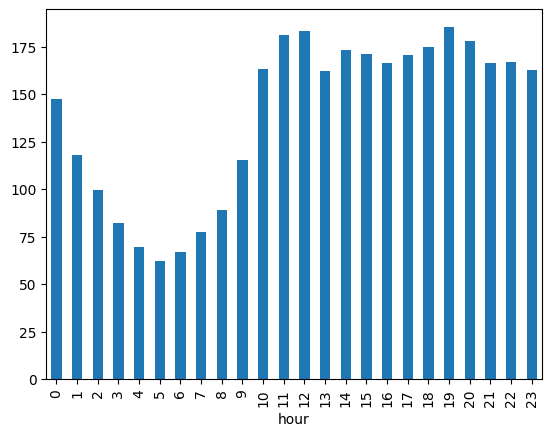

In [16]:
train.groupby("hour")["Count"].mean().plot.bar()

<Axes: xlabel='weekend'>

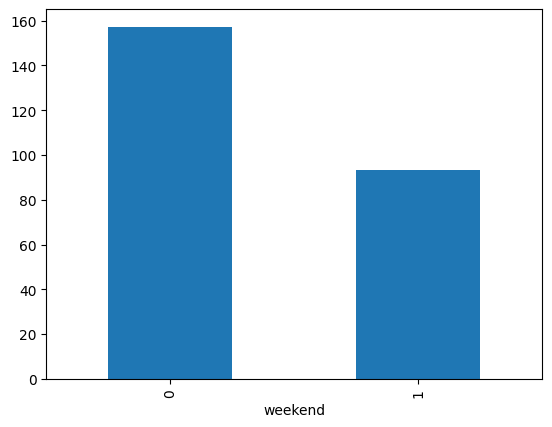

In [17]:
train.groupby("weekend")['Count'].mean().plot.bar()

,ID,Datetime,Count,year,month,day,hour,day of a week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


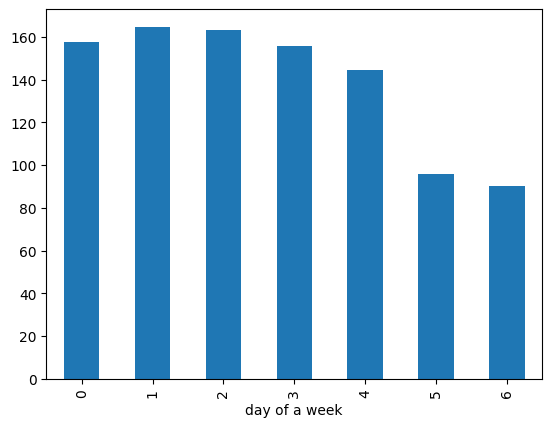

In [18]:
train.groupby("day of a week")["Count"].mean().plot.bar()
train.head()

In [19]:
train=train.drop("ID",axis=1)

In [20]:
train.index=train.Datetime
train.head()

,Datetime,Count,year,month,day,hour,day of a week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [21]:
hourly=train.resample("H").mean()


In [22]:
daily=train.resample("D").mean()

In [23]:
weekly=train.resample("W").mean()

In [24]:
monthly=train.resample("M").mean()

<Axes: title={'center': 'Monthly'}, xlabel='Datetime'>

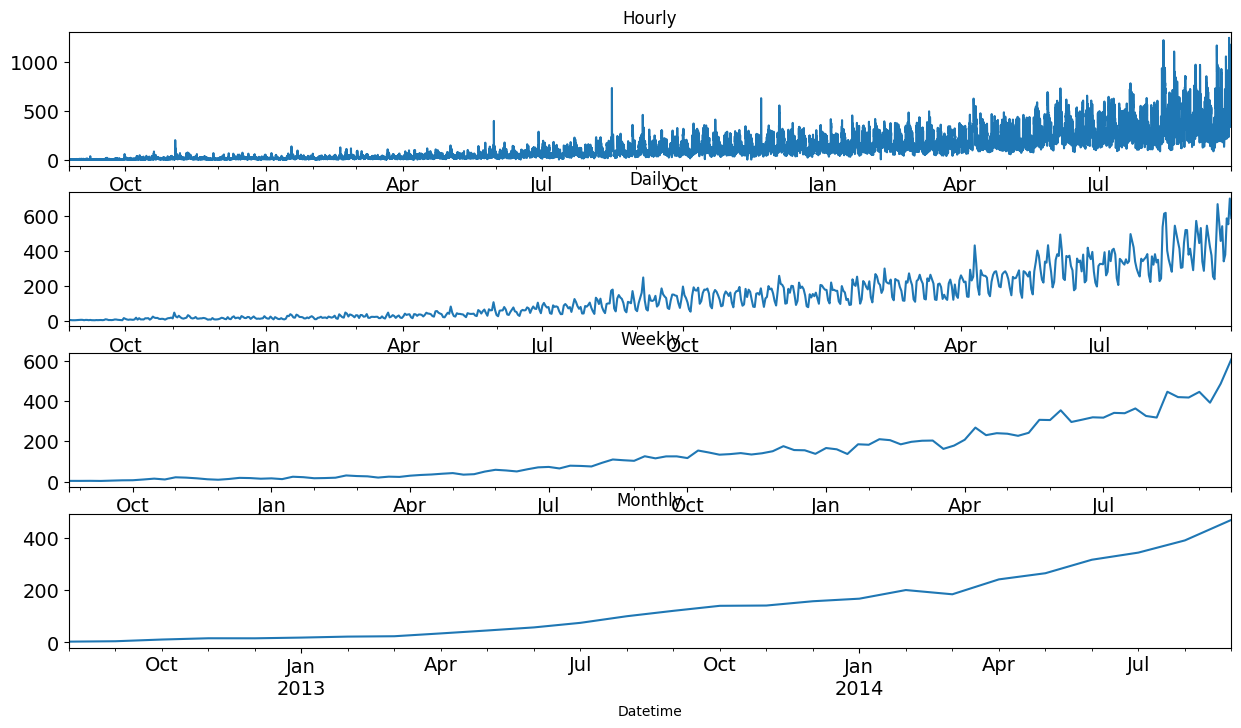

In [25]:
fig,axs=plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8),title="Hourly",fontsize=14,ax=axs[0])
daily.Count.plot(figsize=(15,8), title="Daily",fontsize=14,ax=axs[1])
weekly.Count.plot(figsize=(15,8), title="Weekly",fontsize=14,ax=axs[2])
monthly.Count.plot(figsize=(15,8), title="Monthly",fontsize=14,ax=axs[3])

In [26]:
test.Timestamp=pd.to_datetime(test.Datetime,format='%d-%m--%y %H;%M')
test.index=test.Timestamp


C:\Users\lokes\AppData\Local\Temp\ipykernel_21024\2039580236.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp=pd.to_datetime(test.Datetime,format='%d-%m--%y %H;%M')


In [27]:
test=test.resample("D").mean()

In [28]:
train.Timestamp=pd.to_datetime(train.Datetime,format="%d-%m-%Y %H:%M")
train.index=train.Timestamp
train=train.resample("D").mean()

C:\Users\lokes\AppData\Local\Temp\ipykernel_21024\2786838926.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp=pd.to_datetime(train.Datetime,format="%d-%m-%Y %H:%M")


# Splitting Data into Training and Validation Set

In [29]:
# train.head()
start_date=train['Datetime'].min()
print(start_date)

2012-08-25 11:30:00


In [30]:
end_date=train['Datetime'].max()
print(end_date)

2014-09-25 11:30:00


In [31]:
Train=train.loc['2012-08-25':'2014-06-24']
valid=train.loc['2014-06-25':'2014-09-25']

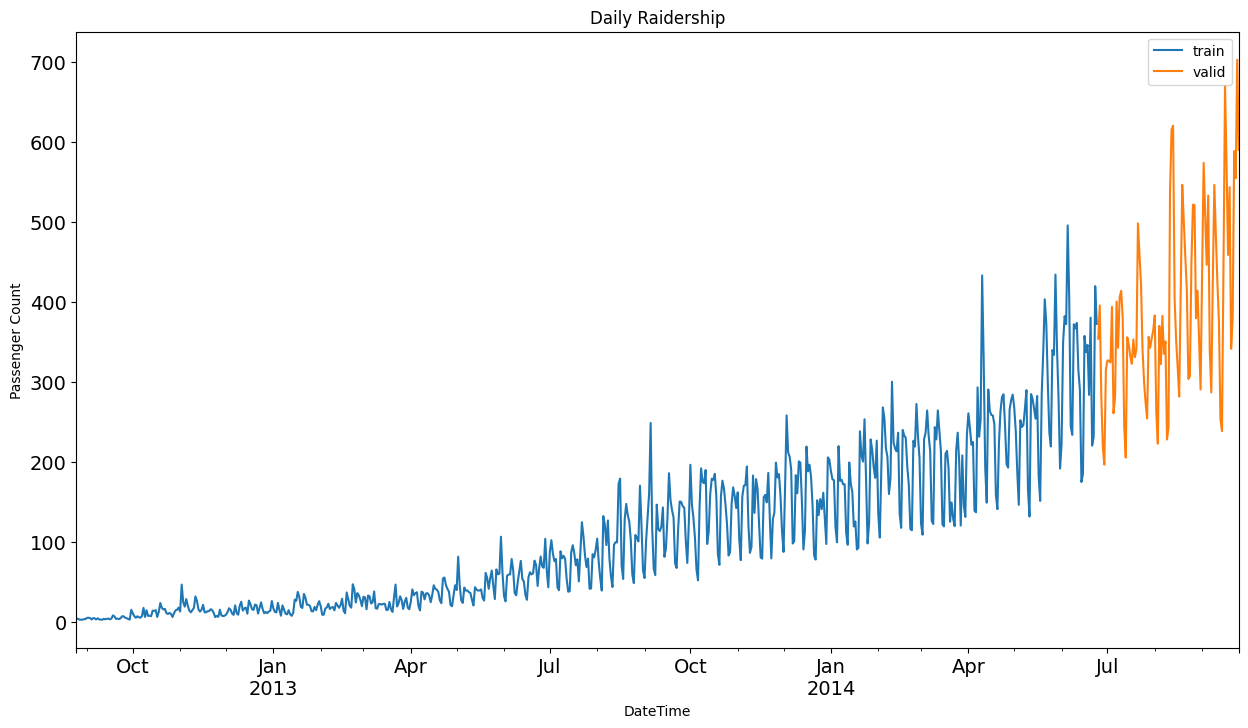

In [32]:
Train.Count.plot(figsize=(15,8), fontsize=14,title="Daily Raidership",label="train")
valid.Count.plot(figsize=(15,8), fontsize=14,title="Daily Raidership",label="valid")
plt.xlabel("DateTime")
plt.ylabel("Passenger Count")
plt.legend(loc='best')
plt.show()

# Modling Techniques
# 1. Navie Approach

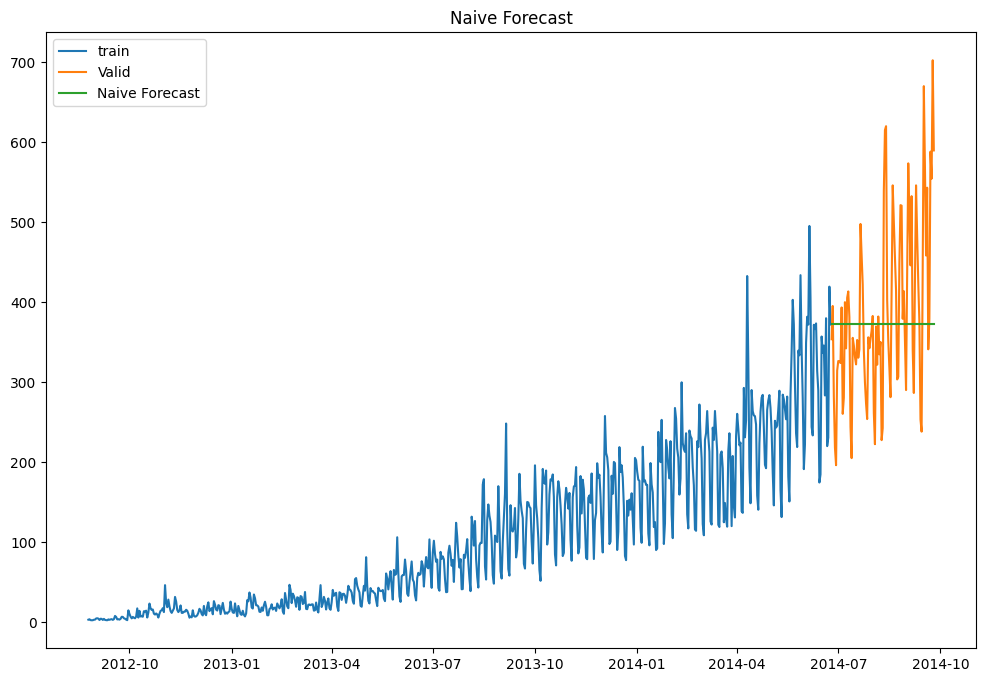

In [33]:
dd=np.asarray(Train.Count)
y_hat=valid.copy()
y_hat["naive"]=dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index,Train["Count"],label='train')
plt.plot(valid.index,valid['Count'],label='Valid')
plt.plot(y_hat.index,y_hat["naive"],label='Naive Forecast')
plt.legend(loc="best")
plt.title("Naive Forecast")
plt.show()

# RMSE calculation for Naive Model


In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(valid.Count,y_hat.naive))
print(rms)

111.79050467496724


we can infer thet this method id not suitable for datasets with variability. we can reduce the rmse valuen by adopting different techniques.

# moving Average
 In this technique we wil take the average of the passenger counts for last few time periods only

Here the prediction are made on the basis of the average of last few points instead od taking all the previously known values

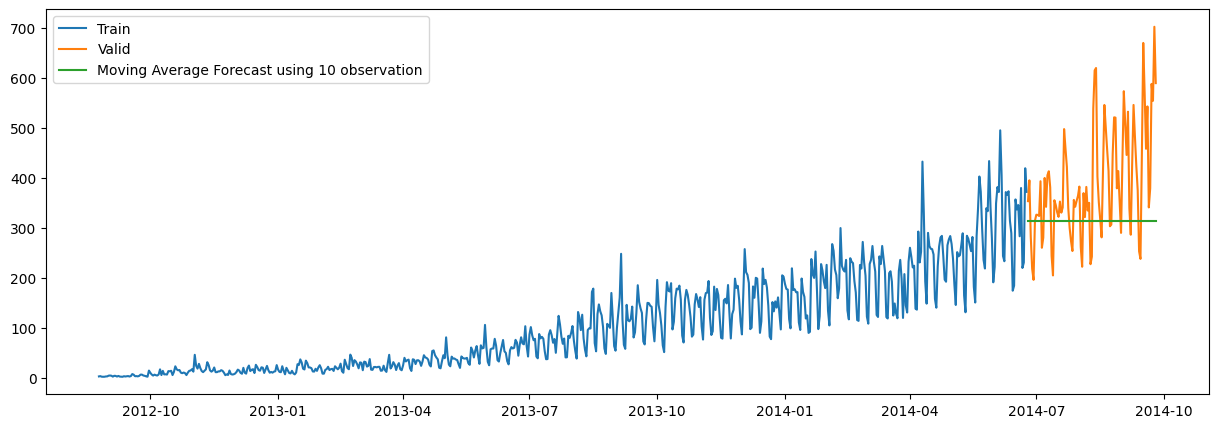

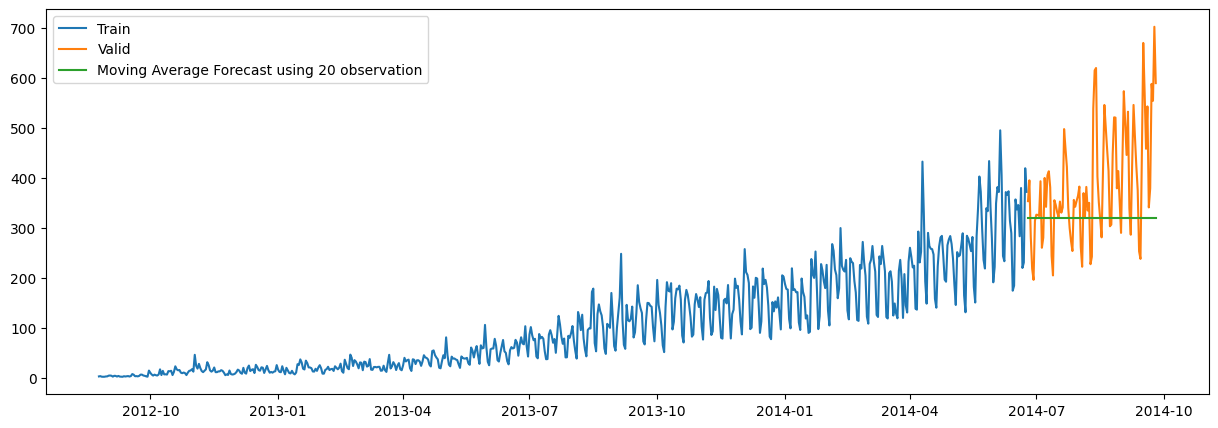

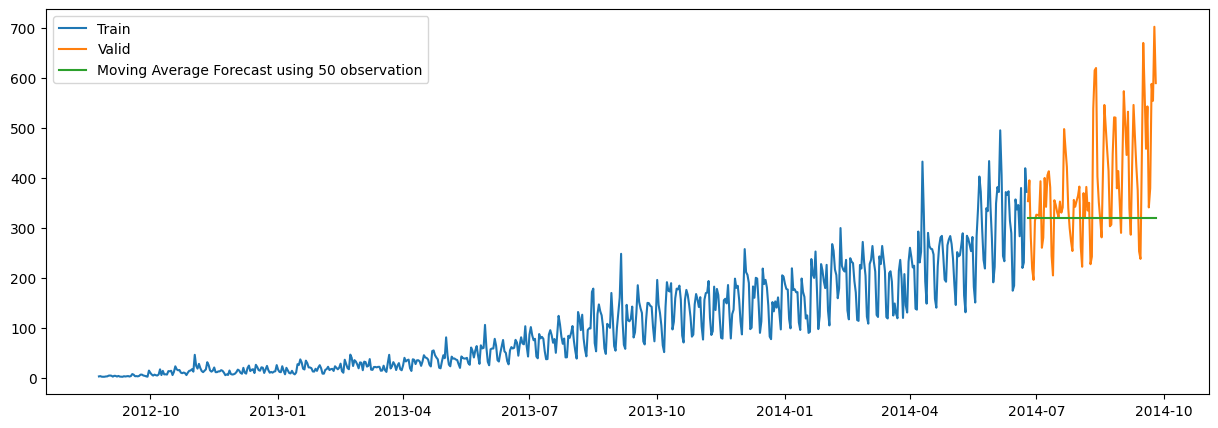

In [35]:
# lets try to rolling mean for last 10,20,50 days and visualize the results
y_hat_avg=valid.copy()
y_hat_avg["moving_avg_forecast"]=Train["Count"].rolling(10).mean().iloc[-1]  #average of last 10 observations
plt.figure(figsize=(15,5))
plt.plot(Train["Count"],label="Train")
plt.plot(valid["Count"],label="Valid")
plt.plot(y_hat_avg['moving_avg_forecast'],label="Moving Average Forecast using 10 observation")
plt.legend(loc="best")
plt.show()


y_hat_avg=valid.copy()
y_hat_avg["moving_avg_forecast"]=Train["Count"].rolling(20).mean().iloc[-1]  #average of last 10 observations
plt.figure(figsize=(15,5))
plt.plot(Train["Count"],label="Train")
plt.plot(valid["Count"],label="Valid")
plt.plot(y_hat_avg['moving_avg_forecast'],label="Moving Average Forecast using 20 observation")
plt.legend(loc="best")
plt.show()



y_hat_avg=valid.copy()
y_hat_avg["moving_avg_forecast"]=Train["Count"].rolling(20).mean().iloc[-1]  #average of last 10 observations
plt.figure(figsize=(15,5))
plt.plot(Train["Count"],label="Train")
plt.plot(valid["Count"],label="Valid")
plt.plot(y_hat_avg['moving_avg_forecast'],label="Moving Average Forecast using 50 observation")
plt.legend(loc="best")
plt.show()



In [36]:
rms=sqrt(mean_squared_error(valid.Count,y_hat_avg.moving_avg_forecast))
print(rms)

130.4498497755042


# simple Exponential Smoothing
    

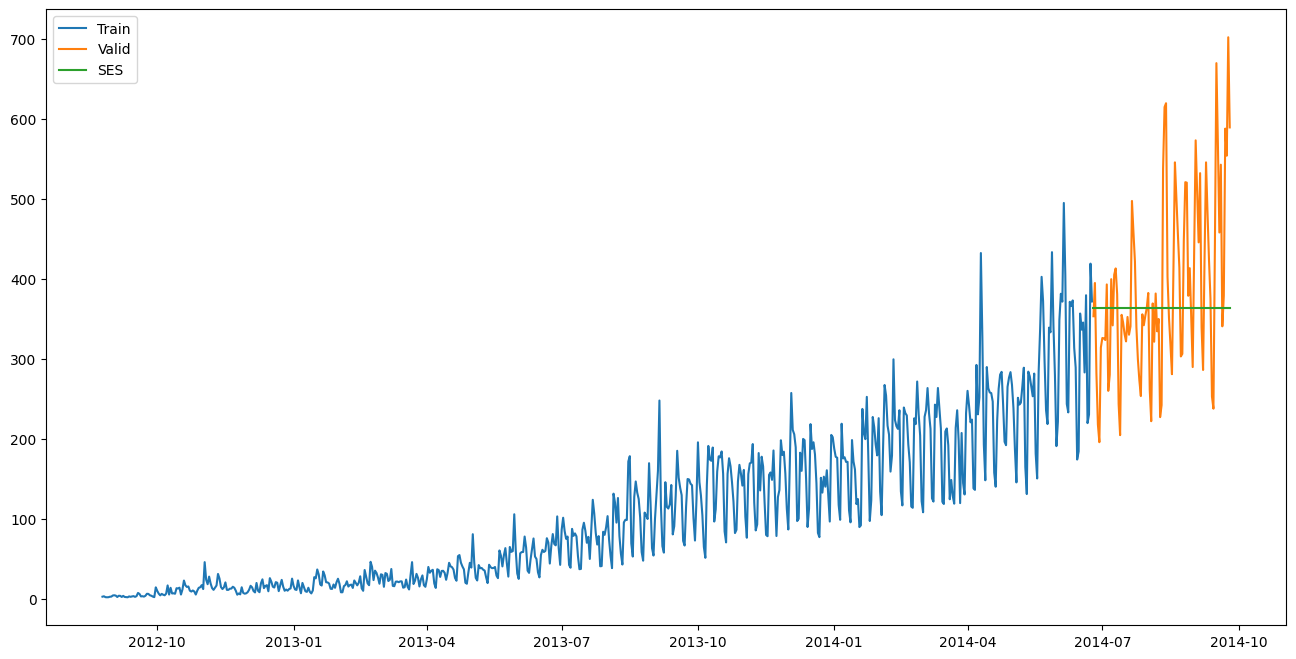

In [37]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt
y_hat_avg=valid.copy()
fit2=SimpleExpSmoothing(np.asarray(Train["Count"])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg["SES"]=fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train["Count"],label='Train')
plt.plot(valid["Count"],label='Valid')
plt.plot(y_hat_avg["SES"],label='SES')
plt.legend(loc="best")
plt.show()

In [38]:
# rms 
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.SES))
print(rms)

113.43708111884514


# Holt's Linear Trend Model

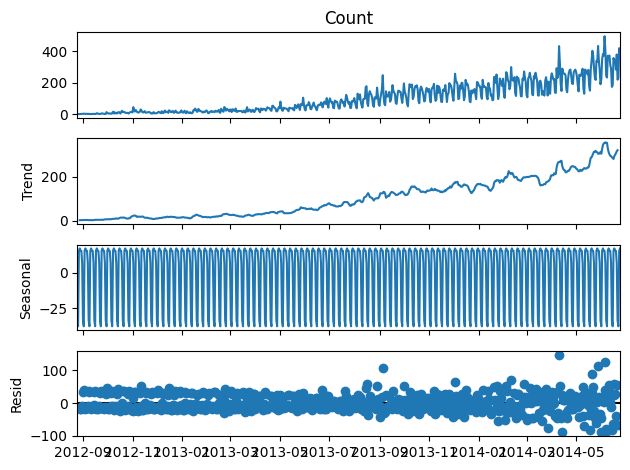

In [39]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result=sm.tsa.stattools.adfuller(train.Count)
plt.show()

c:\Users\lokes\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


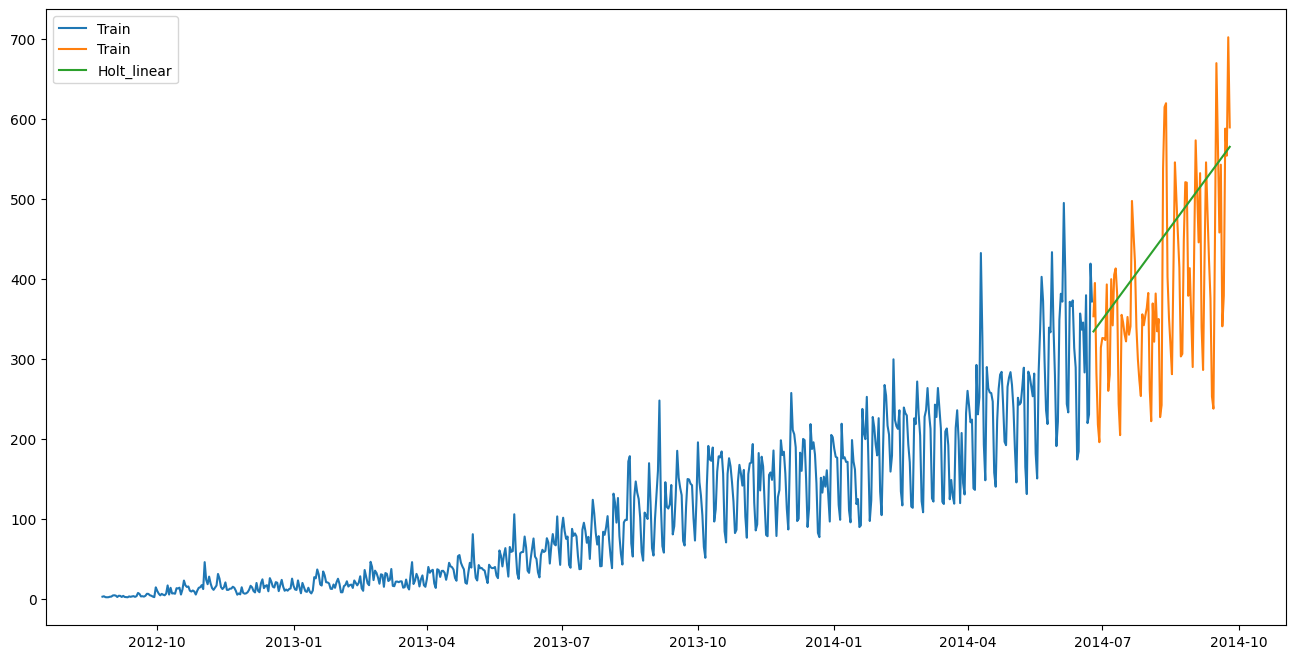

In [40]:
# as increasing trend can be senn in the dataset, so now we will make a model based on the trend
y_hat_avg=valid.copy()
fit1=Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3,smoothing_trend=0.1)
y_hat_avg['Holt_linear']=fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train["Count"],label='Train')
plt.plot(valid["Count"],label="Train")
plt.plot(y_hat_avg["Holt_linear"], label='Holt_linear')
plt.legend(loc="best")
plt.show()

In [41]:
# we can see inclined line here as the model has taken into consideration the trend of the time series

rms=sqrt(mean_squared_error(valid.Count,y_hat_avg.Holt_linear))
print(rms)

# it can be inferref that the rmse value has decreased

112.94278345314041


# Holt's Linear Model on daily time series

In [42]:
submission=pd.read_csv("sample_submission_LSeus50.csv")
predict=fit1.forecast(len(test))
test["prediction"]=predict
submission.head()

,ID,Count
0,18288,0
1,18289,0
2,18290,0
3,18291,0
4,18292,0


In [43]:
# calculate the hourly ratio of count
train_Original_data['ratio']=train_Original_data["Count"]/train_Original_data['Count'].sum()
train_Original_data.head()

,ID,Datetime,Count,year,month,day,hour,ratio
0,0,2012-08-25 00:00:00,8,2012,8,25,0,3.148037e-06
1,1,2012-08-25 01:00:00,2,2012,8,25,1,7.870093e-07
2,2,2012-08-25 02:00:00,6,2012,8,25,2,2.361028e-06
3,3,2012-08-25 03:00:00,2,2012,8,25,3,7.870093e-07
4,4,2012-08-25 04:00:00,2,2012,8,25,4,7.870093e-07


In [44]:
# Grouping the hourly ratio
temp = train_Original_data.groupby(["hour"])['ratio'].sum()

# Groupby to csv format
pd.DataFrame(temp,columns=["hour","ratio"]).to_csv("GROUPby.csv")

In [45]:
temp2=pd.read_csv("GROUPby.csv")
temp2.head()
temp2=temp2.drop("hour.1",axis=1)
temp2.head()

,hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802


In [46]:
# merge test and test_original on day, month and year
merge=pd.merge(test,test_Original_data, on=("day","month","year"), how="left")
merge['hour']=merge["hour_y"]
merge=merge.drop(['year',"month","Datetime_x","hour_x","hour_y"],axis=1)
merge.columns

Index(['ID_x', 'day', 'prediction', 'ID_y', 'Datetime_y', 'hour'], dtype='object')

In [47]:
# Predicting by merging merge and temp2
prediction= pd.merge(merge, temp2,on='hour', how="left")


In [48]:
# converting the ratio to the Original scale
prediction['Count']= prediction["prediction"]*prediction['ratio']*24
prediction["ID"]=prediction["ID_y"]

In [49]:
# lets drop all other features from the submission file and keep Id and Count only.
submission=prediction.drop(["ID_x","day","ID_y","prediction",'hour',"ratio"],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission,columns=["Id",'Count']).to_csv("Holt linear.csv")


# Holt winter's model on daily time series

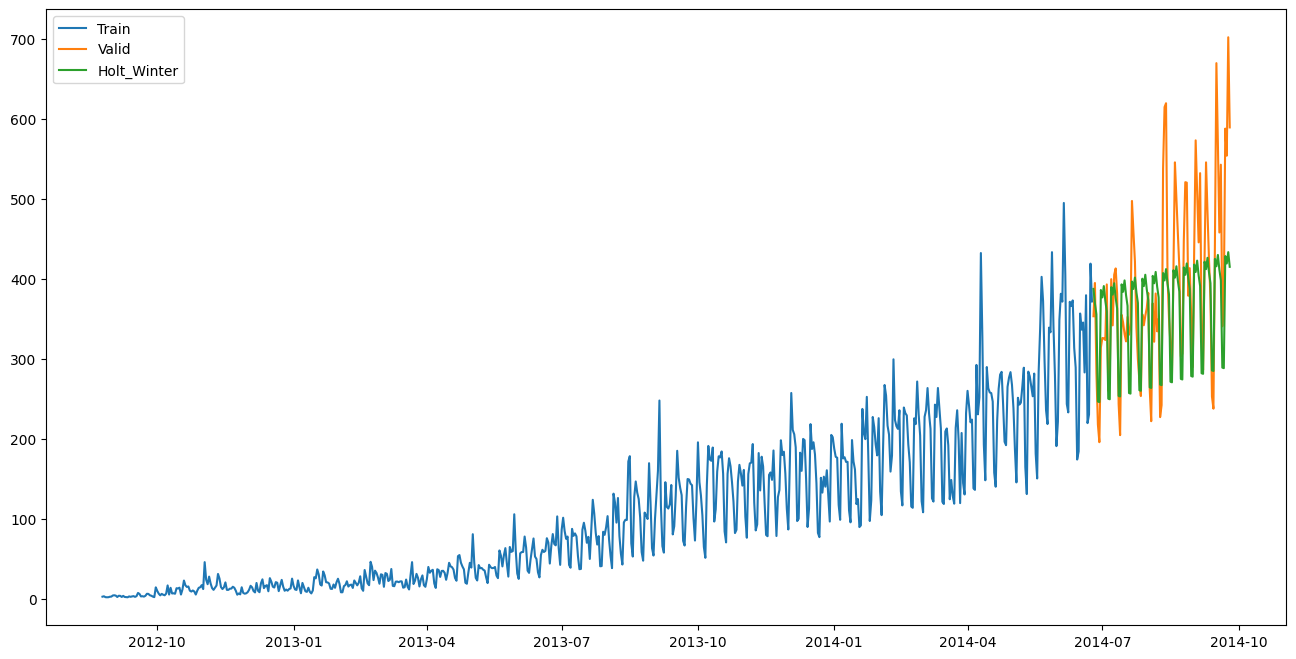

In [50]:
y_hat_avg=valid.copy()
fit1=ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods=7, trend='add', seasonal="add").fit()
y_hat_avg["Holt_Winter"]= fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train["Count"], label="Train")
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg["Holt_Winter"], label="Holt_Winter")
plt.legend(loc="best")
plt.show()

In [51]:
rms=sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter))
print(rms)

82.06945557801939


In [52]:
predict=fit1.forecast(len(test))

In [53]:
# # now we will convert daily pasenger count into hourly passenger count using the same approach which we followed above
# test["prediction"]=predict

# # Merge Test and test_original_data on day, month and year
merge=pd.merge(test,test_Original_data, on =("day","month","year"), how= "left")
merge['hour']=merge["hour_y"]
merge=merge.drop(["year","month","Datetime_x",'hour_x',"hour_y"], axis=1)

merge.head()


,ID_x,day,prediction,ID_y,Datetime_y,hour
0,18299.5,26.0,334.650767,18288,2014-09-26 00:00:00,0
1,18299.5,26.0,334.650767,18289,2014-09-26 01:00:00,1
2,18299.5,26.0,334.650767,18290,2014-09-26 02:00:00,2
3,18299.5,26.0,334.650767,18291,2014-09-26 03:00:00,3
4,18299.5,26.0,334.650767,18292,2014-09-26 04:00:00,4


In [54]:
#Converting the ratio to the original scale

prediction["Count"]=prediction["prediction"]*prediction["ratio"]*24

#drop all features onther than ID and Count

prediction["Id"]=prediction['ID_y']
submission=prediction.drop(["day","hour","ratio","prediction","ID_x","ID_y"], axis=1)

In [55]:
# converting the final submission to csv format
pd.DataFrame(submission,columns=["ID","Count"]).to_csv("Holt winter.csv")


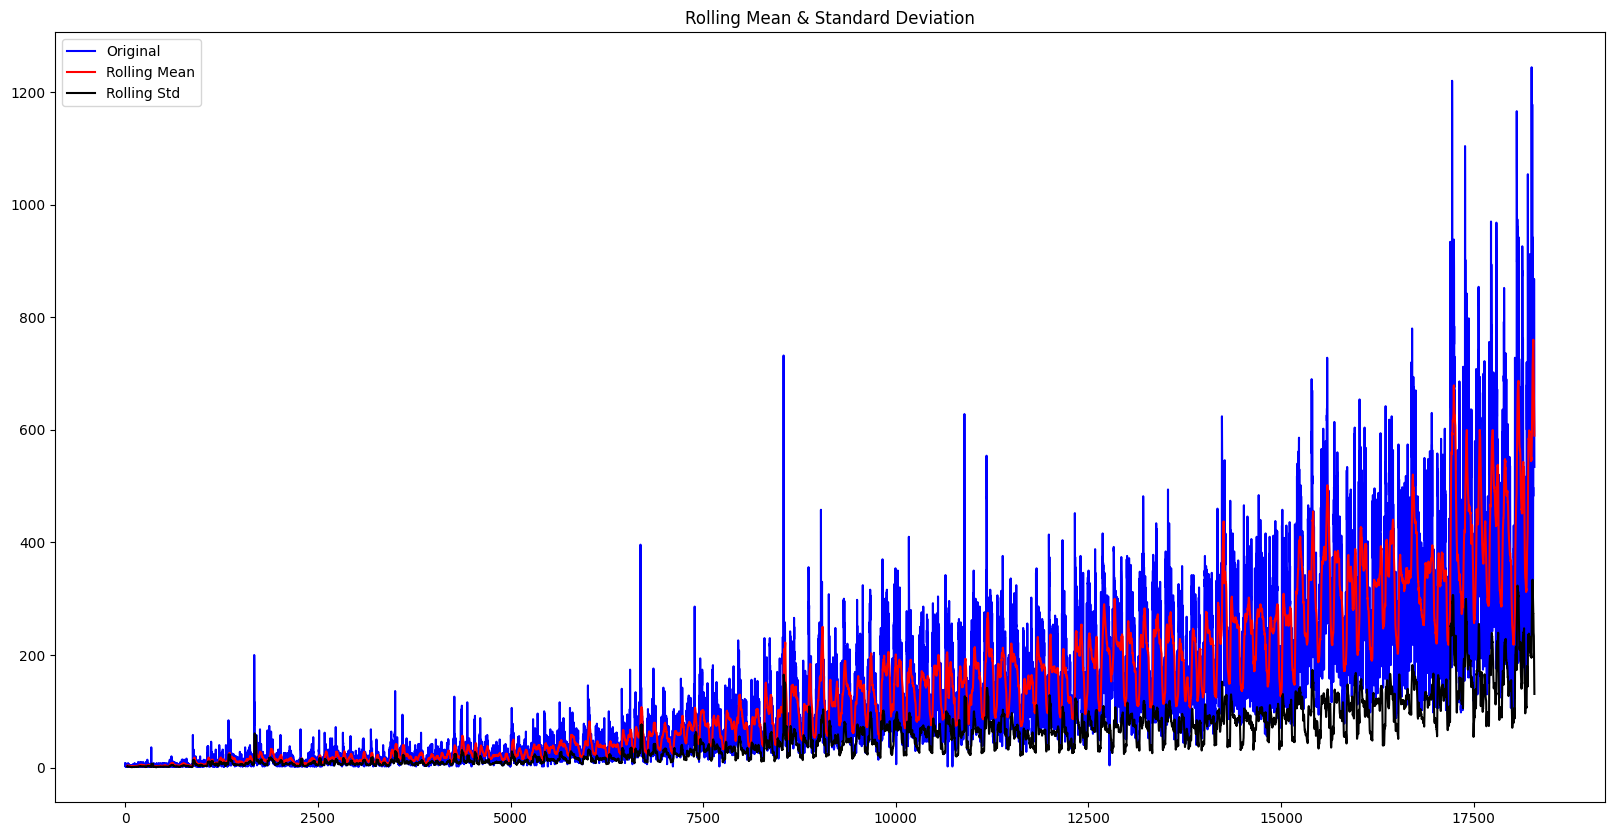

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [57]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd

def test_stationarity(timeseries):
    # Ensure the data is numeric
    timeseries = pd.to_numeric(timeseries, errors='coerce')
    
    # Drop NaN values for stability
    timeseries = timeseries.dropna()
    
    # Determining rolling statistics
    rolmean = timeseries.rolling(window=24).mean()  # 24-hour rolling mean
    rolstd = timeseries.rolling(window=24).std()   # 24-hour rolling std
    
    # Plot rolling statistics
    plt.figure(figsize=(20, 10))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

# Example usage
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

# Call the function with the appropriate data column
test_stationarity(train_Original_data['Count'])


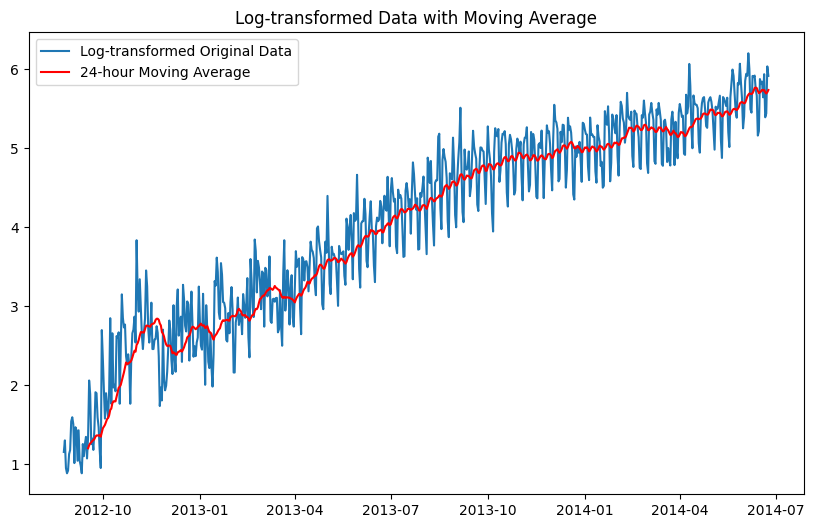

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming Train and valid DataFrames are already defined

# Log transformation
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

# Calculate 24-period moving average
moving_avg = Train_log.rolling(window=24).mean()

# Plot the log-transformed data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(Train_log, label='Log-transformed Original Data')
plt.plot(moving_avg, color='red', label='24-hour Moving Average')
plt.legend(loc='best')
plt.title('Log-transformed Data with Moving Average')
plt.show()


So we can observe an increasing trend. Now we will remove this increasing trend to make our time series stationary.

Since we took the average of 24 values, rolling mean is not defined for the first 23 values. So let's drop those null values.


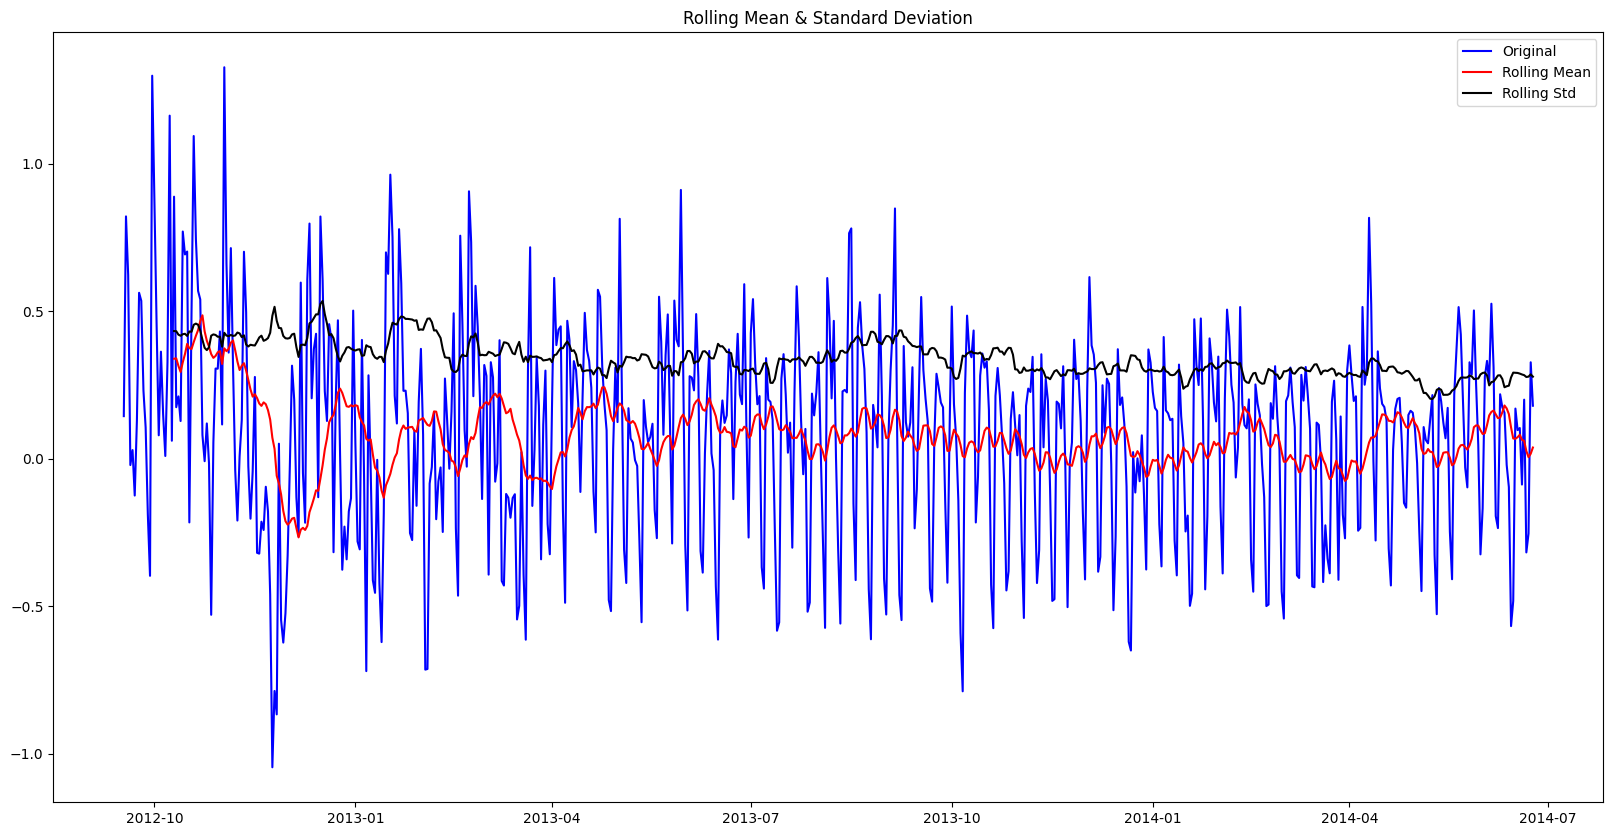

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [60]:

train_log_moving_avg_diff = Train_log-moving_avg
train_log_moving_avg_diff.dropna (inplace = True)
test_stationarity (train_log_moving_avg_diff)

We can see that the Test Statistic is very smaller as compared to the Critical Value. So, we can be confident that the trend is almost removed.

Let's now stabilize the mean of the time series which is also a requirement for a stationary time series.

Differencing can help to make the series stable and eliminate the trend.

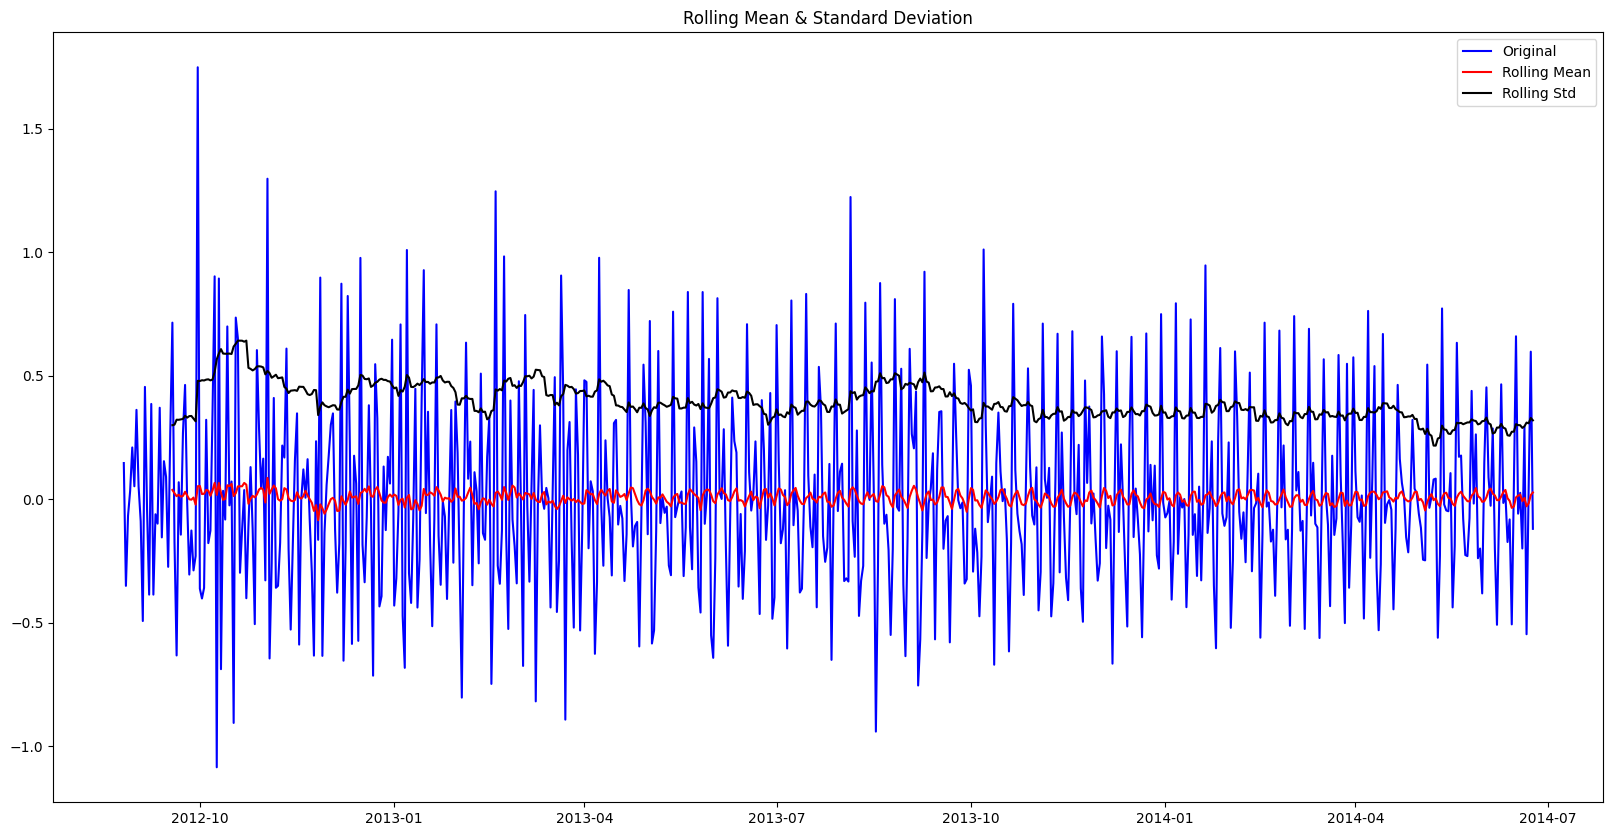

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [61]:
train_log_diff = Train_log-Train_log.shift(1)
test_stationarity (train_log_diff.dropna())

Now we will decompose the time series into trend and seasonality and will get the residual which is the random variation in the series.

# Removing Seasonality

By seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).

Seasonality is always of a fixed and known period.

We will use seasonal decompose to decompose the time series into trend, seasonality and residuals.

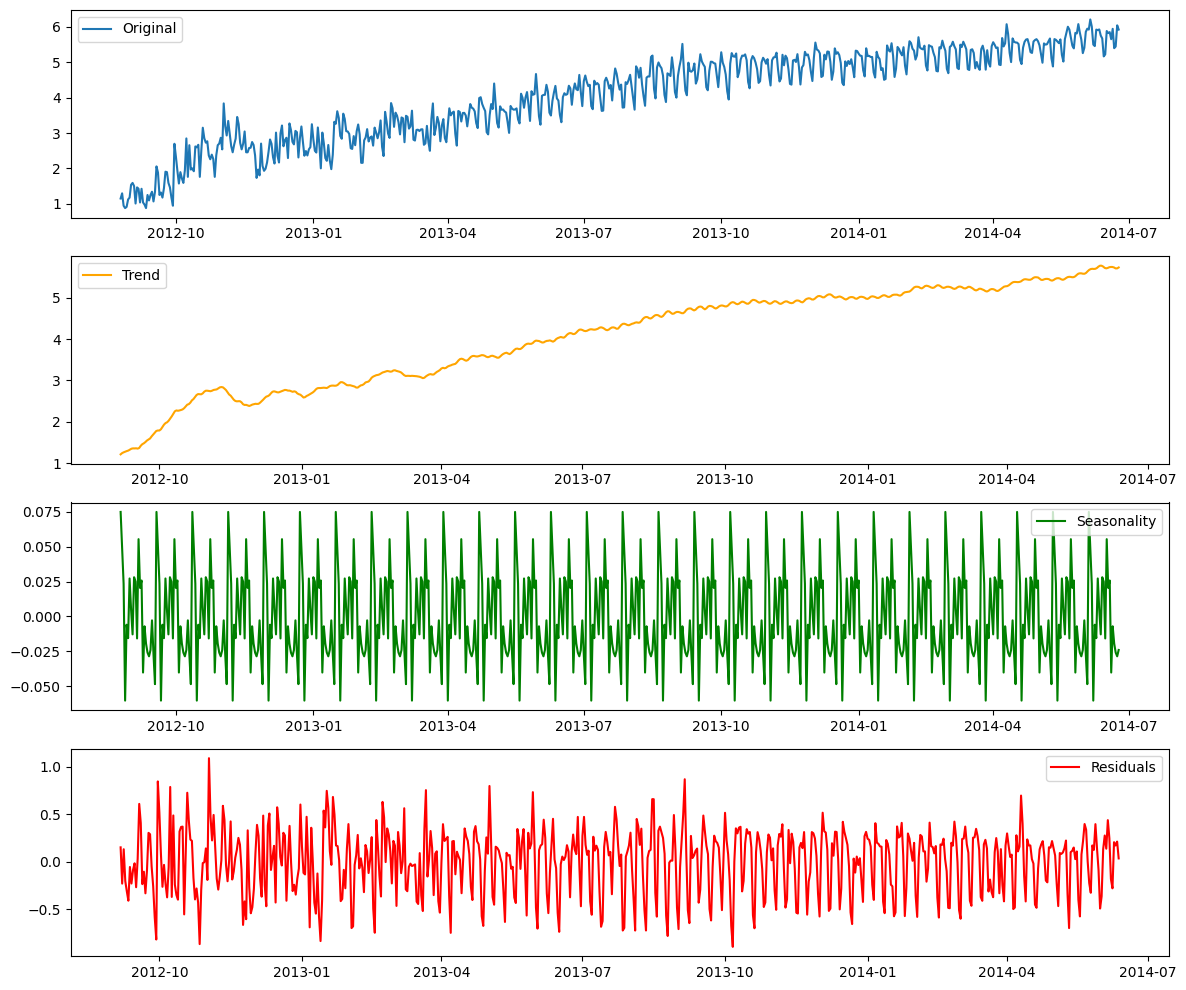

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming Train_log is already defined as the log-transformed data
Train_log = np.log(Train['Count'])

# Perform seasonal decomposition
decomposition = seasonal_decompose(Train_log, model='additive', period=24)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot components
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


We can see the trend, residuals and the seasonality clearly in the above graph. Seasonality shows a constant trend in counter.
Let's check stationarity of residuals.

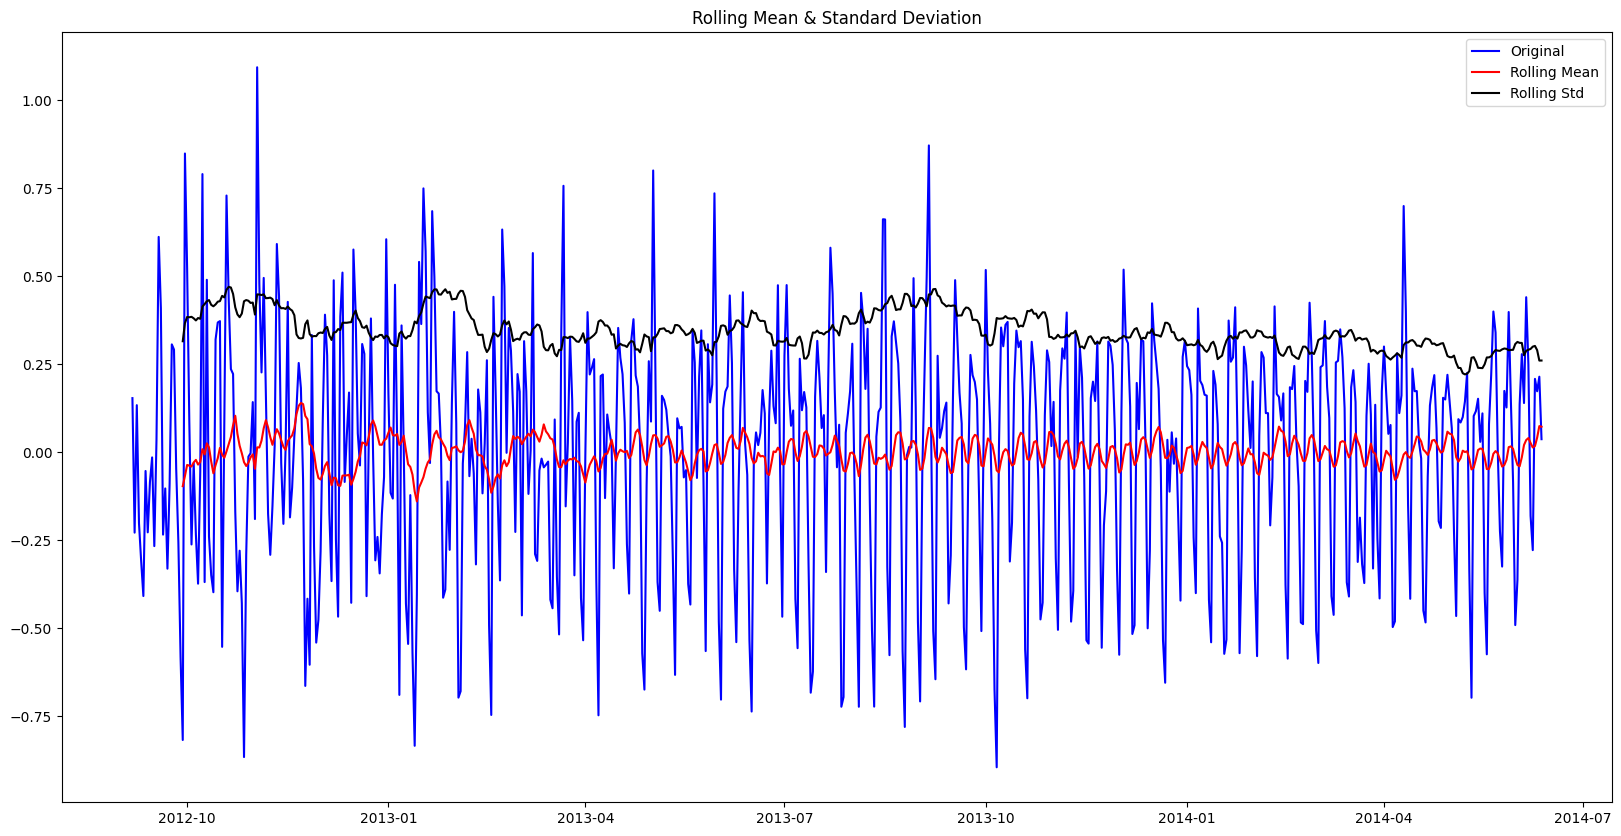

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [65]:
# Create a DataFrame from the residuals
train_log_decompose = pd.DataFrame({'residual': residual})

# Add the original index to the residuals DataFrame
train_log_decompose['date'] = Train_log.index

# Set 'date' as the index
train_log_decompose.set_index('date', inplace=True)

# Drop NaN values from the DataFrame
train_log_decompose.dropna(inplace=True)

# Check stationarity of the residuals using the test_stationarity function
test_stationarity(train_log_decompose['residual'])


It can be interpreted from the results that the residuals are stationary.
• Now we will forecast the time series using different models.
# Forecasting the time series using ARIMA
• First of all we will fit the ARIMA model on our time series for that we have to find the optimized values for the p,d,q parameters. 

• To find the optimized values of these parameters, we will use ACF(Autocorrelation Function) and PACF(Partial Autocorrelation Function) graph.

. ACF is a measure of the correlation between the TimeSeries with a lagged version of itself.

• PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.

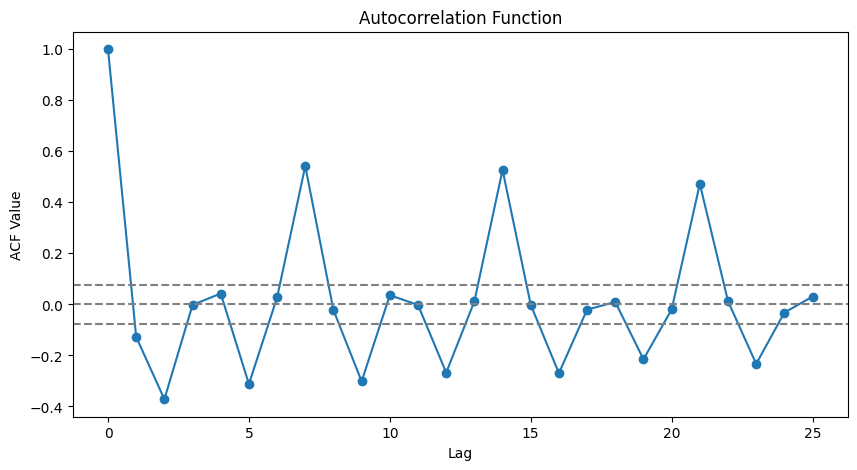

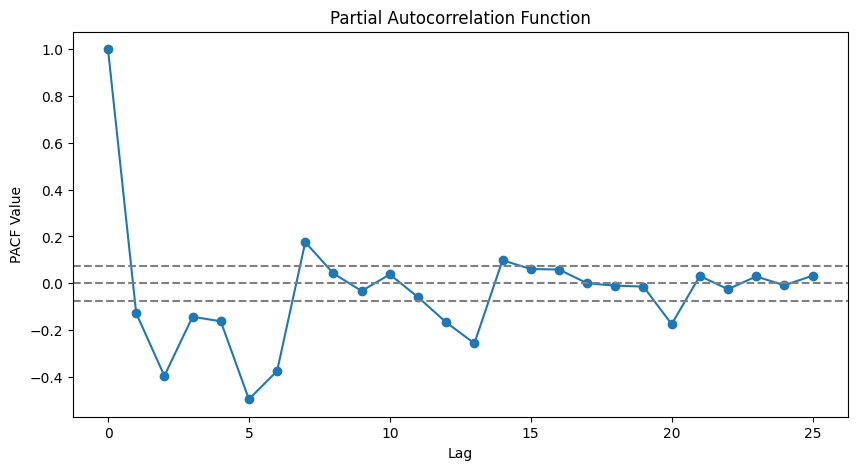

In [67]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
import matplotlib.pyplot as plt

# Calculate ACF and PACF
lag_acf = acf(train_log_diff.dropna(), nlags=25)  # Autocorrelation Function
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')  # Partial Autocorrelation Function

# Plot ACF
plt.figure(figsize=(10, 5))
plt.plot(lag_acf, marker='o')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96 / np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96 / np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.show()

# Plot PACF
plt.figure(figsize=(10, 5))
plt.plot(lag_pacf, marker='o')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96 / np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96 / np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('PACF Value')
plt.show()


• p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=2.

q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=2.

• Now we will make the ARIMA model as we have the p,q values. We will make the AR and MA model separately and then combine them together.

# AR model
The autoregressive model specifies that the output variable depends linearly on its own previous values.

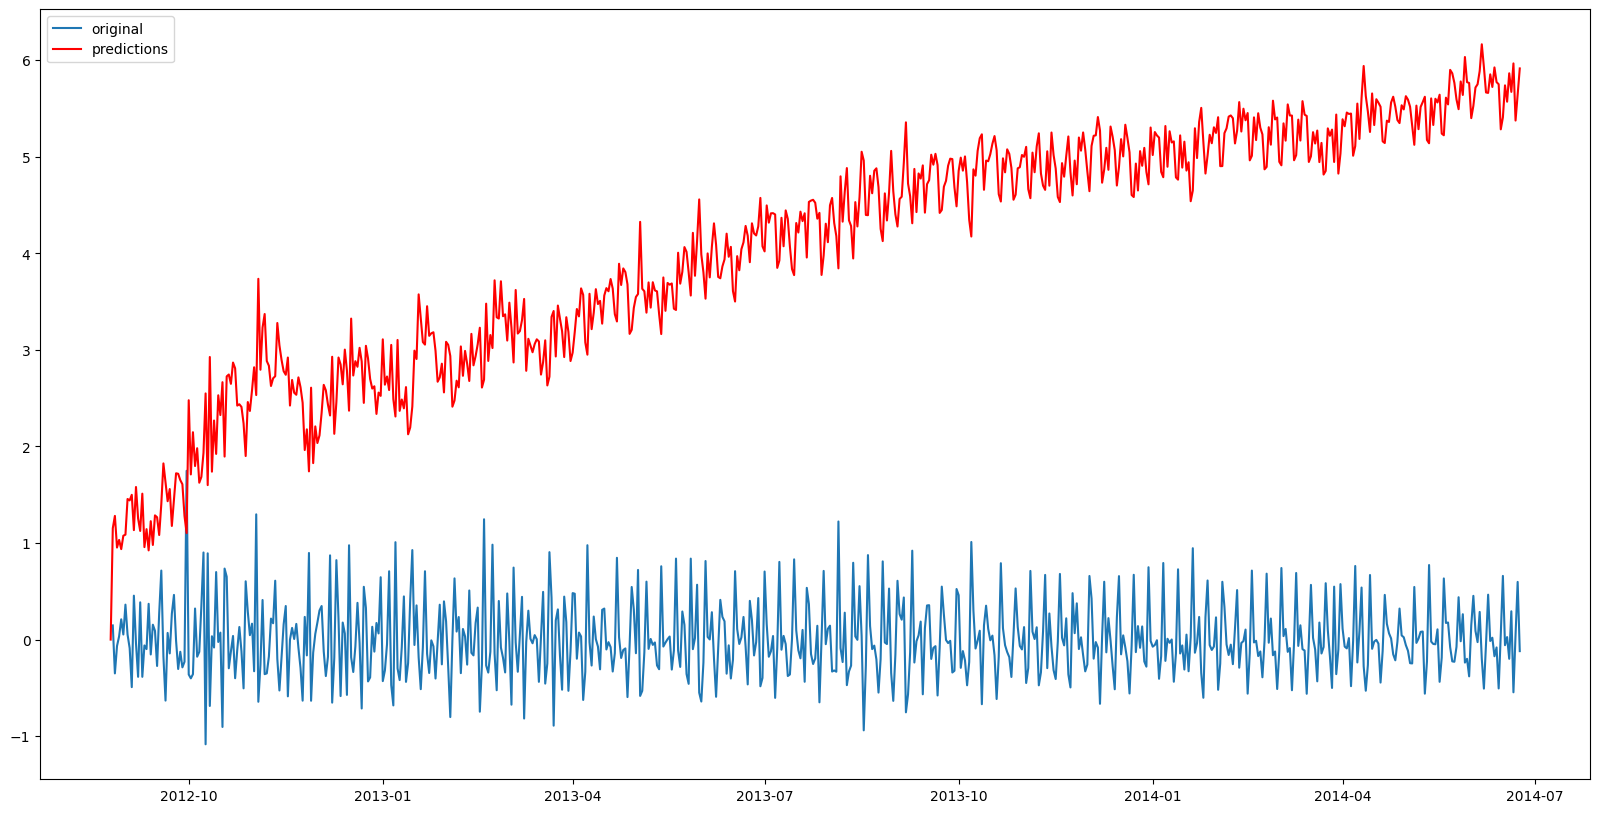

In [82]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA (Train_log, order=(2, 1, 0)) # here the q value is zero sinceit is just the AR model
results_AR = model.fit()
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

Lets plot the validation curve for AR model.
We have to change the scale of the model to the original scale.
First step would be to store the predicted results as a separate series and observe it.

C:\Users\lokes\AppData\Local\Temp\ipykernel_21024\2710630219.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0],


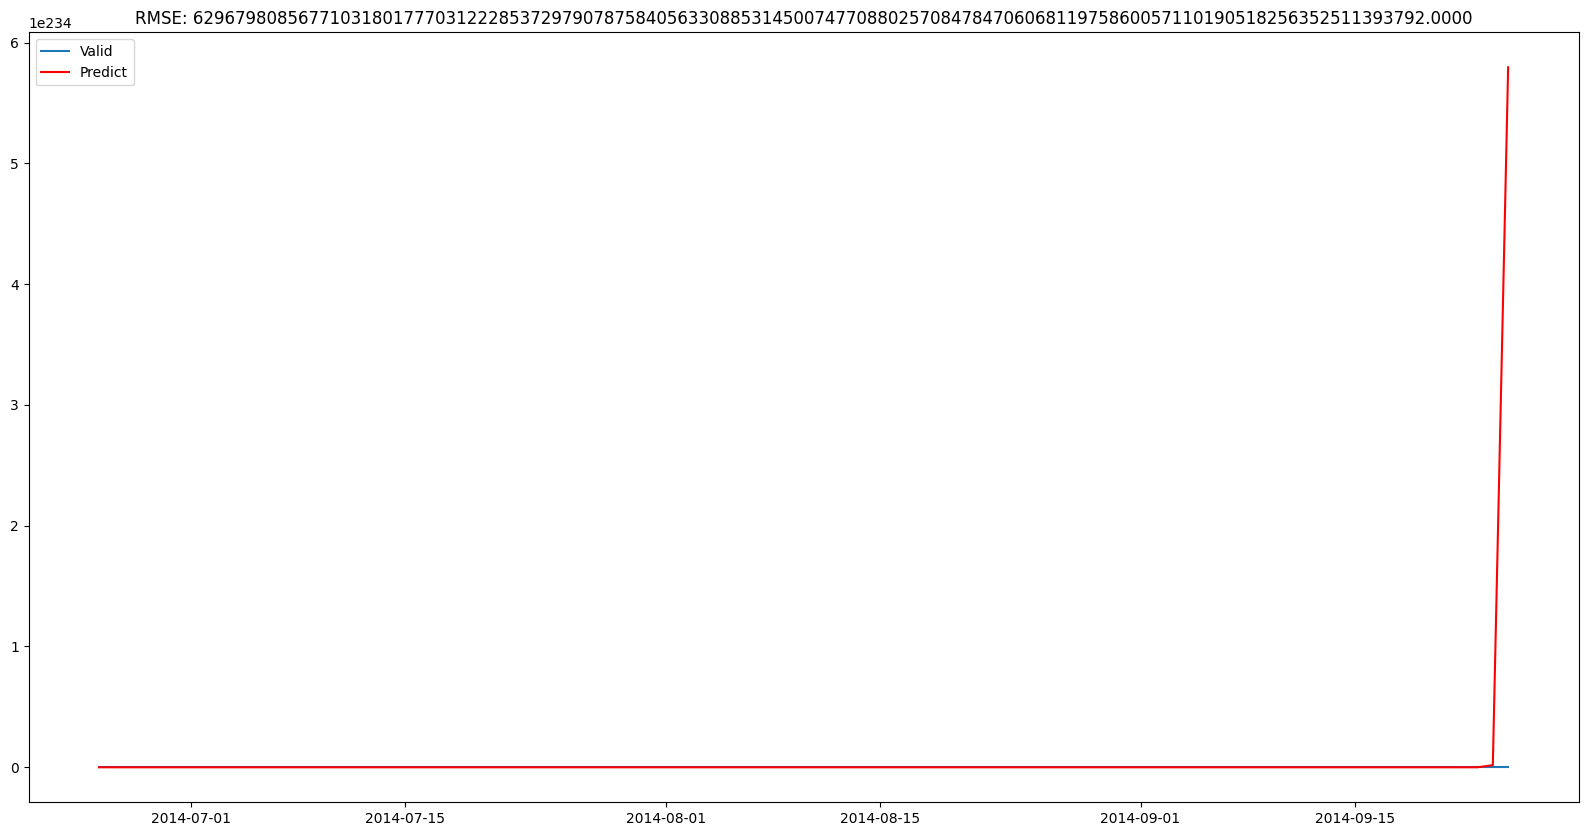

In [79]:

AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0],
index = valid.index)
AR_predict1=AR_predict1.add(AR_predict, fill_value=0)
AR_predict = np.exp(AR_predict1)
plt.plot(valid['Count'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict,
valid['Count']))/valid.shape[0])) 
plt.show()

c:\Users\lokes\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


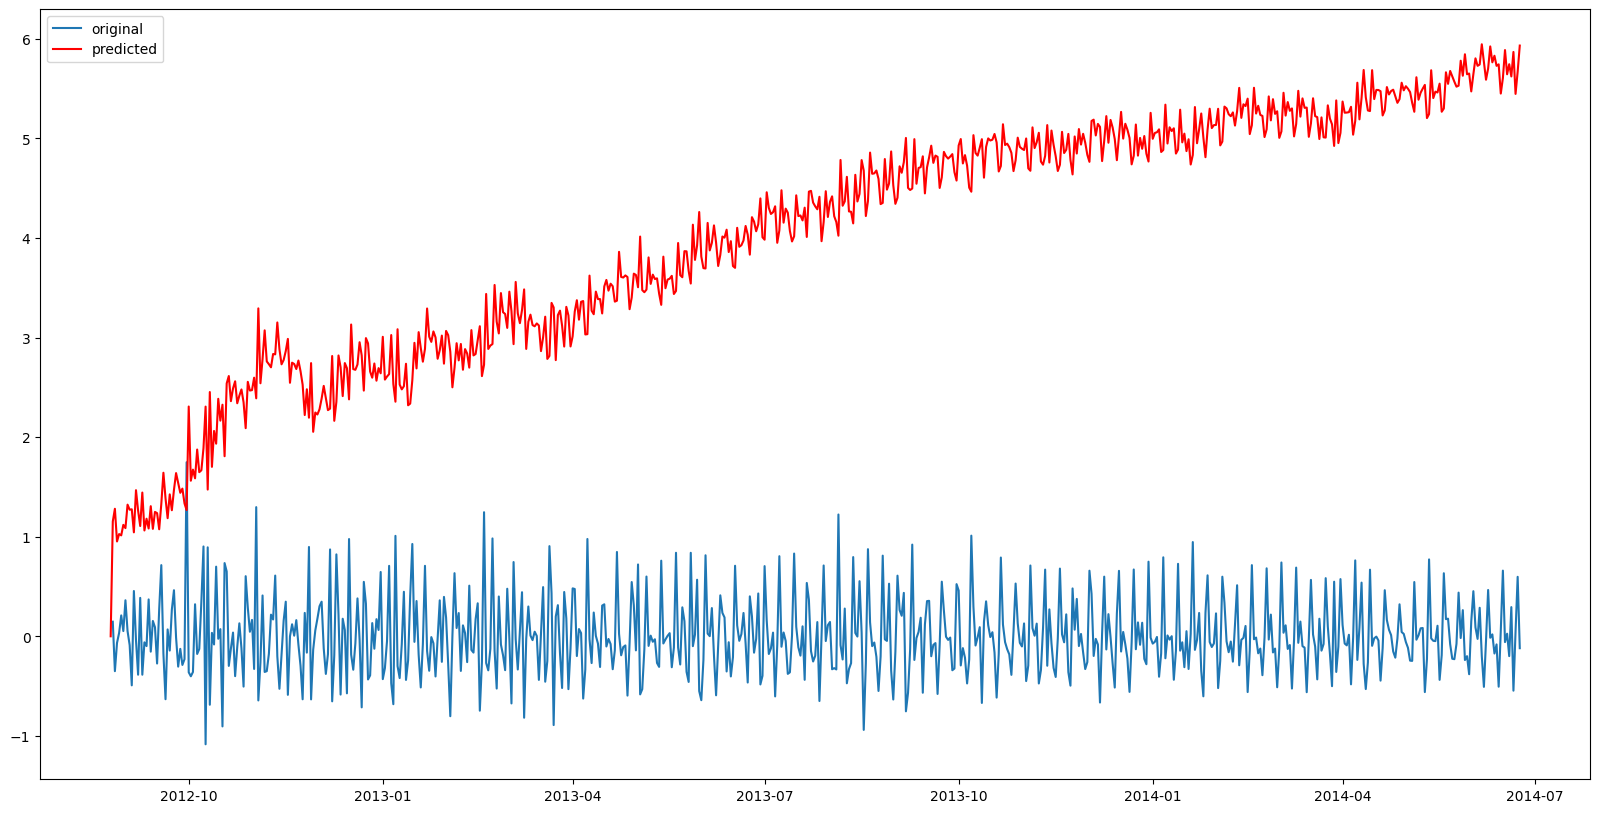

In [85]:
# Combined model
model = ARIMA (Train_log, order=(2, 1, 2))
results_ARIMA=  model.fit()
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()

C:\Users\lokes\AppData\Local\Temp\ipykernel_21024\233611350.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predict_base = pd.Series(np.ones(given_set.shape[0])*np.log(given_set['Count'])[0],index=given_set.index)


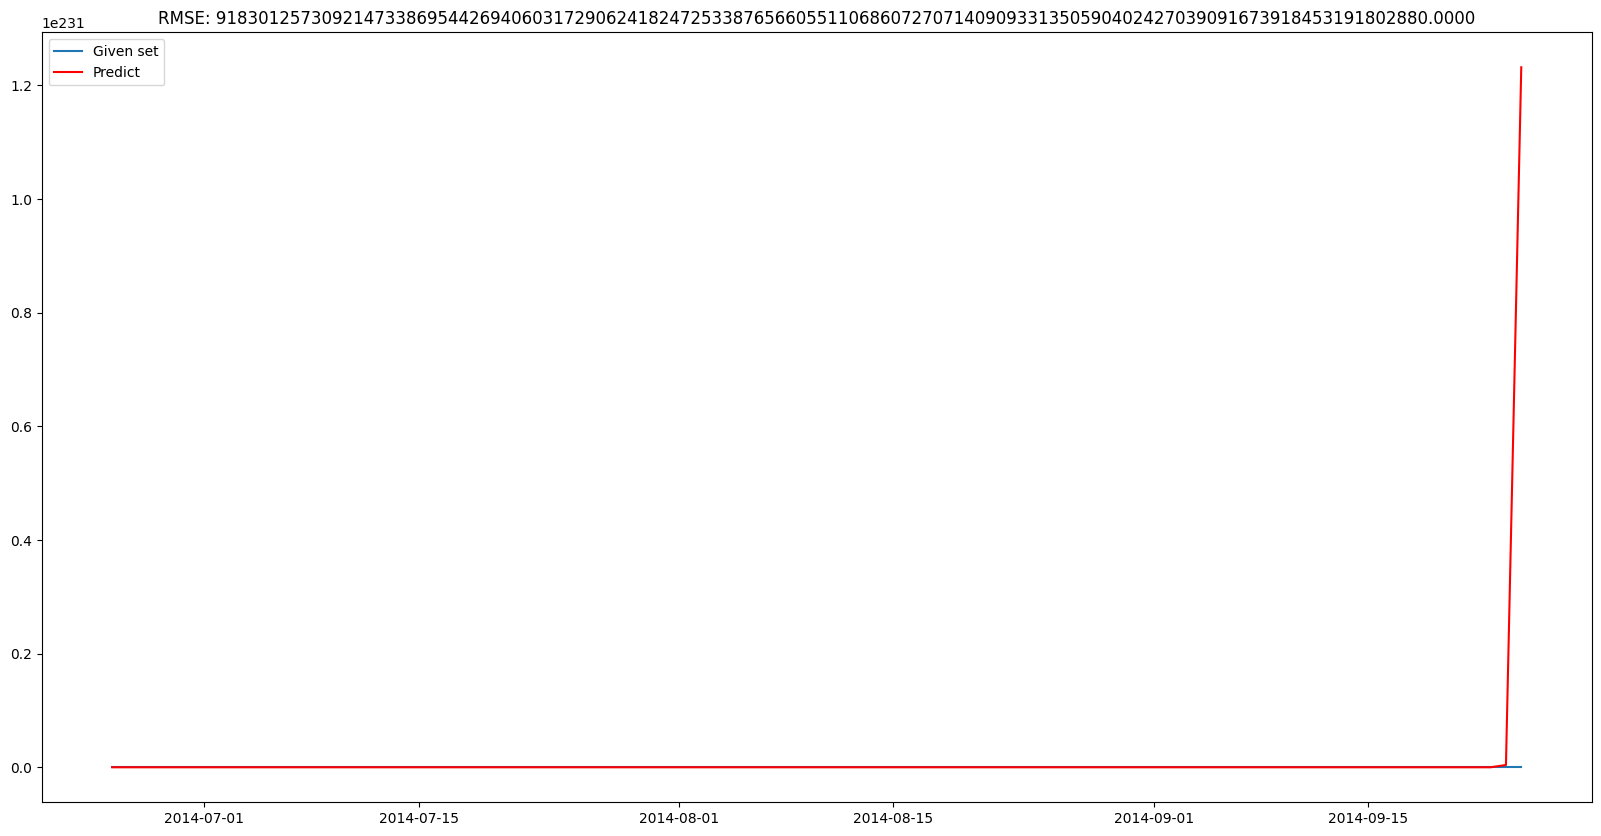

In [89]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff=predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0])*np.log(given_set['Count'])[0],index=given_set.index)
    predict_log=predict_base.add(predict_diff,fill_value=0)
    predict=np.exp(predict_log)

    plt.plot(given_set["Count"], label = "Given set")
    plt.plot(predict, color = 'red' , label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict,given_set['Count']))/given_set.shape[0]))
    plt.show()

def check_prediction_log(predict_log,given_set):
    predict = np.exp(predict_log)

    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = "red", label = "Predict")
    plt.legend(loc='best')
    plt.title('RMSE: %.4f' % (np.dot(predict,given_set['Count']))/given_set.shape[0])
    plt.show()

ARIMA_predict_diff = results_ARIMA.predict(start="2014-06-25", end='2014-09-25')

check_prediction_diff(ARIMA_predict_diff,valid)
